# 03 Data Visualization

## Introduction

This notebook focuses on the **data visualization** phase of the Traffic Accident Analysis project. The purpose of this step is to explore accident patterns through charts and geospatial maps, providing insights that are not immediately visible in raw tables.  

During this phase, I will:  
- Visualize the distribution of accident severity and location.  
- Identify regional accident hotspots using geospatial heatmaps.  
- Explore temporal patterns and relationships between variables.  
- Incorporate interactive filters (e.g., by severity, state, and date range) to allow dynamic exploration of the data.  

By the end of this notebook, I will have a clearer understanding of accident trends across geography and time. These insights will serve as a foundation for building predictive models in Notebook 4.


## Step 1(a): Load and Inspect Data

Here I load the cleaned dataset and perform basic checks to confirm it was imported correctly.  
This includes viewing the shape, column names, and the first few rows.

In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Loading cleaned dataset
df = pd.read_csv(
    "C:/Users/tuite/Desktop/Software Portfolio/python/Traffic_Accident_Analysis/data/final_cleaned_accident_data.csv"
)

# Check dataset shape (rows, columns)
print("Shape:", df.shape)

# View column names
print("\nColumns:")
print(df.columns.tolist())

# Preview first 5 rows
df.head()

Shape: (6985228, 40)

Columns:
['Source', 'Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Street', 'City', 'County', 'State', 'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


,Source,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,Source2,3,2016-02-08 05:46:00,39.865147,-84.058723,0.01,I-70 E,Dayton,Montgomery,OH,...,False,False,False,False,False,False,Night,Night,Night,Night
1,Source2,2,2016-02-08 06:07:59,39.928059,-82.831184,0.01,Brice Rd,Reynoldsburg,Franklin,OH,...,False,False,False,False,False,False,Night,Night,Night,Day
2,Source2,2,2016-02-08 06:49:27,39.063148,-84.032608,0.01,State Route 32,Williamsburg,Clermont,OH,...,False,False,False,False,True,False,Night,Night,Day,Day
3,Source2,3,2016-02-08 07:23:34,39.747753,-84.205582,0.01,I-75 S,Dayton,Montgomery,OH,...,False,False,False,False,False,False,Night,Day,Day,Day
4,Source2,2,2016-02-08 07:39:07,39.627781,-84.188354,0.01,Miamisburg Centerville Rd,Dayton,Montgomery,OH,...,False,False,False,False,True,False,Day,Day,Day,Day


## Step 1(b): Data Types and Missing Values

Before visualizing, I want to confirm the data types of each column and check how many non-null values each contains.


In [17]:
# Display datatypes and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6985228 entries, 0 to 6985227
Data columns (total 40 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Source                 object 
 1   Severity               int64  
 2   Start_Time             object 
 3   Start_Lat              float64
 4   Start_Lng              float64
 5   Distance(mi)           float64
 6   Street                 object 
 7   City                   object 
 8   County                 object 
 9   State                  object 
 10  Zipcode                object 
 11  Timezone               object 
 12  Airport_Code           object 
 13  Weather_Timestamp      object 
 14  Temperature(F)         float64
 15  Wind_Chill(F)          float64
 16  Humidity(%)            float64
 17  Pressure(in)           float64
 18  Visibility(mi)         float64
 19  Wind_Direction         object 
 20  Wind_Speed(mph)        float64
 21  Precipitation(in)      float64
 22  Weather_Condition 

## Step 1(c): Summary Statistics

Next, I’ll generate summary statistics to check the numerical columns to understand their ranges and averages, and to see if there are obvious outliers that might affect my analysis.


In [18]:
# Summary statistics for numerical columns
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Severity,6985228.0,2.229248,0.498871,1.000000,2.000000,2.000000,2.000000,4.000000
Start_Lat,6985228.0,36.226467,5.055433,24.554800,33.422088,35.815208,40.096470,49.002201
Start_Lng,6985228.0,-94.765767,17.355449,-124.623833,-117.217552,-87.894154,-80.387223,-67.113167
Distance(mi),6985228.0,0.516879,1.746987,0.000000,0.000000,0.010000,0.388000,441.750000
Temperature(F),6985228.0,61.733494,18.726477,-89.000000,50.000000,64.000000,75.900000,207.000000
Wind_Chill(F),6985228.0,59.126660,19.056552,-89.000000,52.000000,62.000000,70.000000,207.000000
Humidity(%),6985228.0,65.063512,22.545655,1.000000,49.000000,67.000000,84.000000,100.000000
Pressure(in),6985228.0,29.564573,0.978442,0.000000,29.410000,29.870000,30.030000,58.630000
Visibility(mi),6985228.0,9.114111,2.679151,0.000000,10.000000,10.000000,10.000000,140.000000
Wind_Speed(mph),6985228.0,7.641697,5.197583,0.000000,5.000000,7.000000,10.000000,1087.000000


## Step 1(d): Categorical Summary

In addition to numerical features, the dataset contains several categorical columns (e.g., `State`, `City`, `Weather_Condition`).  
To better understand these, I’ll display these columns to see the most frequent values, like which state or weather condition occurs most often.


In [19]:
# Summary statistics for categorical columns
df.describe(include=["object", "category"]).T


,count,unique,top,freq
Source,6985228,3,Source1,3582466
Start_Time,6985228,5539720,2021-01-26 16:16:13,225
Street,6985228,319644,I-95 N,71314
City,6985228,13601,Houston,159960
County,6985228,1868,Los Angeles,479604
State,6985228,49,CA,1567136
Zipcode,6985228,771884,91761,11911
Timezone,6985228,4,US/Eastern,3211766
Airport_Code,6985228,2045,KCQT,107460
Weather_Timestamp,6985228,922562,2022-03-13 01:53:00,968


## Step 1 Summary

The dataset was successfully loaded with just under 7 million rows and 40 columns.  
- Numerical features show realistic ranges, but there are some extreme outliers (e.g. distances >400 miles, unrealistic temperatures, and very high wind speeds).  
- Categorical features show California, Los Angeles County, and Houston as major accident hotspots.  
- Most accidents occurred during the day and under fair weather conditions.  

Now i will know what to expect for visualization, where Stats will be shown more effectively through charts and maps.


## Step 2(a): Accident Severity Distribution

To start, I want to visualize how accident severity is distributed across the dataset.  
This will help confirm whether the severity levels are balanced or if certain levels dominate the data.


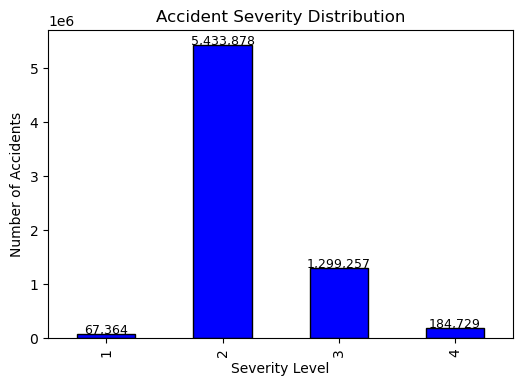

In [20]:
# Severity distribution
severity_counts = df["Severity"].value_counts().sort_index()

plt.figure(figsize=(6,4))
ax = severity_counts.plot(kind="bar", color="blue", edgecolor="black")
ax.set_title("Accident Severity Distribution")
ax.set_xlabel("Severity Level")
ax.set_ylabel("Number of Accidents")

# Add value labels
for i, v in enumerate(severity_counts):
    ax.text(i, v + 5000, f"{v:,}", ha="center", fontsize=9)

plt.show()


## Step 2(b): Top States by Accident Count

Next, I’ll check which U.S. states report the highest number of accidents.  
This gives a first geographic perspective before moving on to maps.


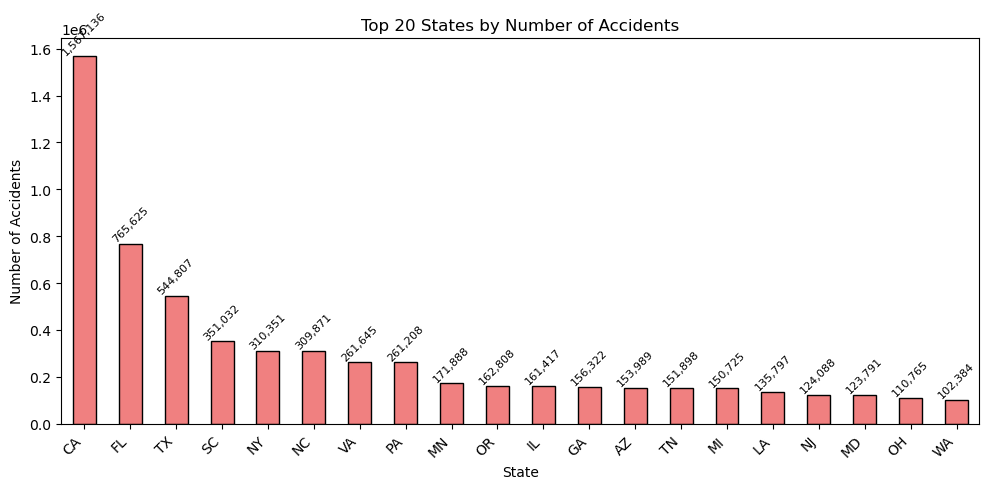

In [21]:
# Top 20 states by accident count
state_counts = df["State"].value_counts().head(20)

plt.figure(figsize=(10,5))
ax = state_counts.plot(kind="bar", color="lightcoral", edgecolor="black")
ax.set_title("Top 20 States by Number of Accidents")
ax.set_xlabel("State")
ax.set_ylabel("Number of Accidents")
plt.xticks(rotation=45, ha="right")

# adding lable values in diagonally as they were overlapping
for i, v in enumerate(state_counts):
    ax.text(i, v, f"{v:,}", ha="center", va="bottom", fontsize=8, rotation=45)


plt.tight_layout()
plt.show()


## Step 2 Summary

- Accident severity is shlolwing majority are at level 2, showing most incidents are moderate.  
- California is by far the highest accident state, followed by other large/populous states.  
- These patterns highlight where accidents concentrate and set up the move to the next step.


## Step 3: Accident Heatmap (All Accidents)

To understand the geographic distribution of accidents, I will create a folium heatmap using latitude and longitude data.  
This will highlight hotspots across the U.S.


In [ ]:
import folium
from folium.plugins import HeatMap
import os

# Make 'visuals' folder if not already there
os.makedirs("visuals", exist_ok=True)

# Start map centered on the US
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4, tiles="cartodbdark_matter")

# Sample the data (plotting all points would be too much)
sample_df = df.sample(100000, random_state=42)  # 100k random points

# Create heatmap
heat_data = list(zip(sample_df["Start_Lat"], sample_df["Start_Lng"]))
HeatMap(heat_data, radius=8, blur=6).add_to(m)

# Save map
m.save("visuals/accident_heatmap.html")

# Display map in notebook
m


📍 [View the interactive accident heatmap](https://TiarnanTuite.github.io/traffic_accident_analysis/accident_heatmap.html)


## Step 3 Summary

The heatmap highlights accident hotspots across the U.S.  

- The East Coast shows a much higher concentration of accidents.  
- This makes sense given higher population density compared to the West.  
- California also stands out as a major hotspot, but the overall spread in the West is more sparse.  

This confirms the earlier state-level findings (California and Eastern states dominating) and provides a clear geographic visualization of accident concentration.
